### Importação dos dados



In [54]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

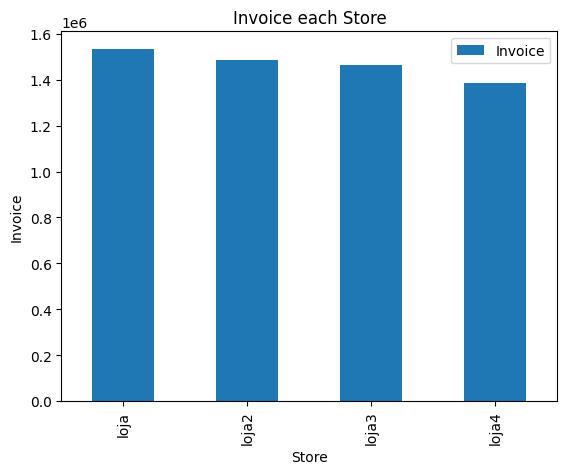

In [56]:
stores_invoice = pd.DataFrame({
    'loja': [loja['Preço'].sum()],
    'loja2': [loja2['Preço'].sum()],
    'loja3': [loja3['Preço'].sum()],
    'loja4': [loja4['Preço'].sum()]
}).T.rename(columns={0: 'Invoice'})

stores_invoice.plot(kind='bar', title='Invoice each Store')
plt.ylabel('Invoice')
plt.xlabel('Store')
plt.show()

In [5]:
#faturamento_lojas = df.groupby('loja','loja2','loja3','loja4')['preco'].sum()
#faturamento_lojas.plot(kind='bar', title='Faturamento por Loja')
#plt.ylabel('Invoice')
#plt.xlabel('Store')
#plt.show()

# 2. Vendas por Categoria


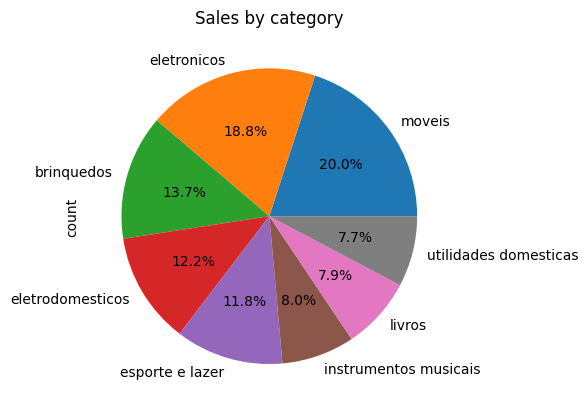

In [57]:
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
sales_category = df['Categoria do Produto'].value_counts()
sales_category.plot(kind='pie', autopct='%1.1f%%', title='Sales by category')
plt.show()



# 3. Média de Avaliação das Lojas

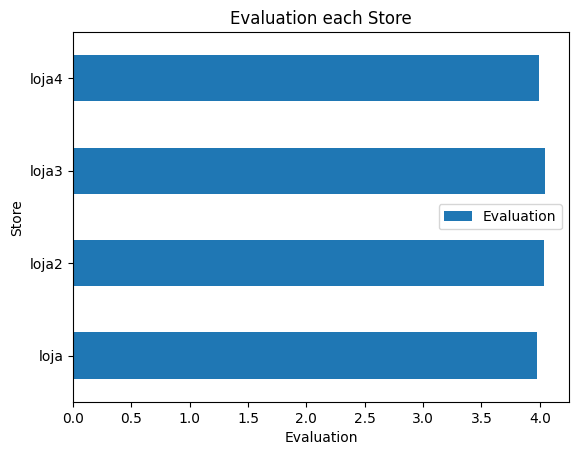

In [58]:
evaluation_average = pd.DataFrame({
    'loja': [loja['Avaliação da compra'].mean()],
    'loja2': [loja2['Avaliação da compra'].mean()],
    'loja3': [loja3['Avaliação da compra'].mean()],
    'loja4': [loja4['Avaliação da compra'].mean()]
}).T.rename(columns={0: 'Evaluation'})

evaluation_average.plot(kind='barh', title='Evaluation each Store')
plt.ylabel('Store')
plt.xlabel('Evaluation')
plt.show()

# 4. Produtos Mais e Menos Vendidos

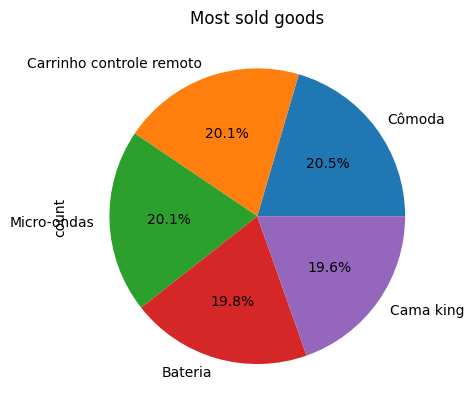

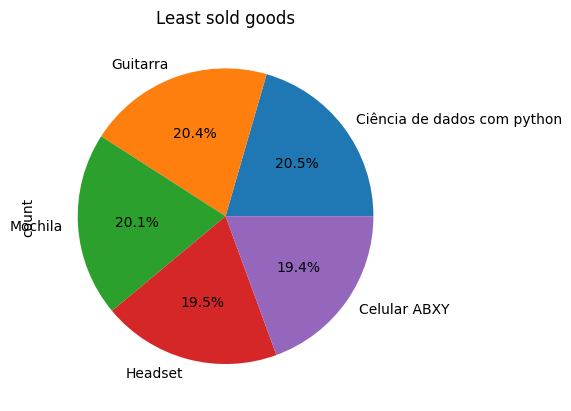

In [59]:
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
most_sold_goods = df['Produto'].value_counts().head(5)
least_sold_goods = df['Produto'].value_counts().tail(5)

most_sold_goods.plot(kind='pie', autopct='%1.1f%%', title='Most sold goods')
plt.show()
least_sold_goods.plot(kind='pie', autopct='%1.1f%%', title='Least sold goods')
plt.show()


# 5. Frete Médio por Loja


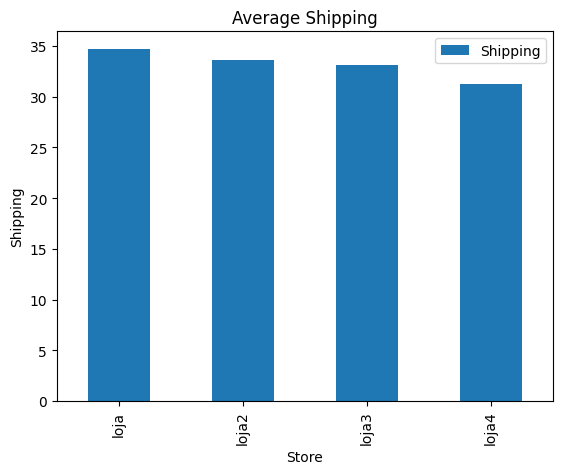

In [60]:
average_shipping=pd.DataFrame({
    'loja':[loja['Frete'].mean()],
    'loja2':[loja2['Frete'].mean()],
    'loja3':[loja3['Frete'].mean()],
    'loja4':[loja4['Frete'].mean()]
}).T.rename(columns={0:'Shipping'})

average_shipping.plot(kind='bar',title='Average Shipping')
plt.ylabel('Shipping')
plt.xlabel('Store')
plt.show()


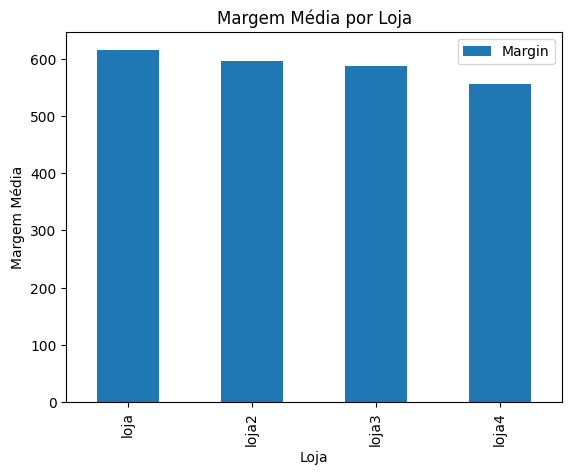

In [61]:
# Tentativa de definir margem de lucro
loja['margem_aprox'] = loja['Preço'] - loja['Frete']
loja2['margem_aprox'] = loja2['Preço'] - loja2['Frete']
loja3['margem_aprox'] = loja3['Preço'] - loja3['Frete']
loja4['margem_aprox'] = loja4['Preço'] - loja4['Frete']


margem_lojas = pd.DataFrame({
    'loja':[loja['margem_aprox'].mean()],
    'loja2':[loja2['margem_aprox'].mean()],
    'loja3':[loja3['margem_aprox'].mean()],
    'loja4':[loja4['margem_aprox'].mean()]
}).T.rename(columns={0:'Margin'})


margem_lojas.plot(kind='bar', title='Margem Média por Loja')
plt.ylabel('Margem Média')
plt.xlabel('Loja')
plt.show()

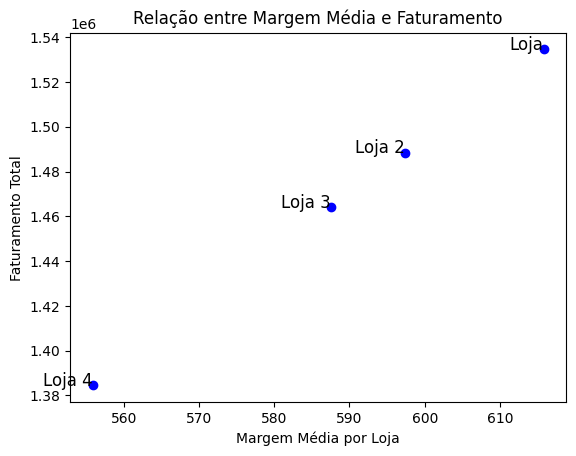

In [63]:
loja['margem_aprox'] = loja['Preço'] - loja['Frete']
loja2['margem_aprox'] = loja2['Preço'] - loja2['Frete']
loja3['margem_aprox'] = loja3['Preço'] - loja3['Frete']
loja4['margem_aprox'] = loja4['Preço'] - loja4['Frete']

margem_lojas = pd.DataFrame({
    'Loja': ['Loja', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Margem Média': [loja['margem_aprox'].mean(), loja2['margem_aprox'].mean(), loja3['margem_aprox'].mean(), loja4['margem_aprox'].mean()],
    'Faturamento Total': [loja['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]
})

plt.scatter(margem_lojas['Margem Média'], margem_lojas['Faturamento Total'], color='blue')

for i in range(len(margem_lojas)):
    plt.text(margem_lojas['Margem Média'][i], margem_lojas['Faturamento Total'][i], margem_lojas['Loja'][i], fontsize=12, ha='right')

plt.xlabel('Margem Média por Loja')
plt.ylabel('Faturamento Total')
plt.title('Relação entre Margem Média e Faturamento')

plt.show()

Relatório

Com base na análise dos dados fornecidos das lojas 'Loja', 'Loja2', 'Loja3' e 'Loja4', foi possível identificar padrões de faturamento, custo operacional e satisfação dos clientes.
Os resultados indicam que Loja4 apresentou o menor lucro, considerando as métricas de faturamento e custos operacionais, como pode ser visto nos últimos dois gráficos. Apesar de receber avaliações relativamente melhores por parte dos clientes, essa vantagem não se mostrou significativa o suficiente para compensar sua baixa eficiência financeira.
Diante disso, considerando a rentabilidade como principal critério de decisão, Loja4 se destaca como a menos eficiente do ponto de vista econômico, podendo ser a candidata mais apropriada para venda.